In [349]:
import numpy as np
import pandas as pd

In [350]:
match = pd.read_csv('./matches.csv')
delivery = pd.read_csv("./deliveries.csv")

match.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [351]:
delivery.rename(columns={"id":"match_id"},inplace=True)
delivery.head()

,match_id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [352]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df


,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1625,1237178,2,132
1626,1237180,1,189
1627,1237180,2,172
1628,1237181,1,156


In [353]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [354]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [355]:
match_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,match_id,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,1216547,201
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,1237177,200
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,1237178,131
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,1237180,189


In [356]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [357]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [358]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team1'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team1'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [359]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [360]:
match_df.shape

(642, 19)

In [361]:
match_df 

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,match_id,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Royal Challengers Bangalore,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,335985,165
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin,335987,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Mumbai Indians,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,1216547,201
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Delhi Capitals,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,1237177,200
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,1237178,131
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,1237180,189


In [362]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [363]:
delivery_df = match_df.merge(delivery,on='match_id')

In [364]:
delivery_df = delivery_df[delivery_df['inning']==2]

In [365]:
delivery_df

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,extra_runs,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152428,1237181,Dubai,Mumbai Indians,156,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals
152429,1237181,Dubai,Mumbai Indians,156,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals
152430,1237181,Dubai,Mumbai Indians,156,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals
152431,1237181,Dubai,Mumbai Indians,156,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,0,0,0,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals


In [366]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [367]:
delivery_df

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152428,1237181,Dubai,Mumbai Indians,156,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,154
152429,1237181,Dubai,Mumbai Indians,156,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,155
152430,1237181,Dubai,Mumbai Indians,156,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,156
152431,1237181,Dubai,Mumbai Indians,156,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,0,0,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,156


In [368]:
delivery_df['runs_left'] = (delivery_df['total_runs_x']-delivery_df['current_score'])+1

In [369]:
delivery_df

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,221
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,220
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152428,1237181,Dubai,Mumbai Indians,156,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,154,3
152429,1237181,Dubai,Mumbai Indians,156,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,155,2
152430,1237181,Dubai,Mumbai Indians,156,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,156,1
152431,1237181,Dubai,Mumbai Indians,156,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,0,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,156,1


In [370]:
delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])
delivery_df

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223,82
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222,81
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,221,80
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,79
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152428,1237181,Dubai,Mumbai Indians,156,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,154,3,12
152429,1237181,Dubai,Mumbai Indians,156,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,155,2,11
152430,1237181,Dubai,Mumbai Indians,156,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,156,1,10
152431,1237181,Dubai,Mumbai Indians,156,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,156,1,9


In [371]:
# delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')
# delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == '0' else '1')
# delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['is_wicket'].values
delivery_df['wickets_left'] = 10 - wickets
delivery_df

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,wickets_left
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223,82,10
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222,81,10
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,221,80,10
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,79,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,78,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152428,1237181,Dubai,Mumbai Indians,156,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,154,3,12,6
152429,1237181,Dubai,Mumbai Indians,156,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,155,2,11,6
152430,1237181,Dubai,Mumbai Indians,156,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,156,1,10,6
152431,1237181,Dubai,Mumbai Indians,156,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,156,1,9,5


In [372]:
# finding current run rate (crr = runs/overs)
delivery_df['crr'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [373]:
# finding req. run rate (rrr = )
delivery_df["rrr"] = (delivery_df['runs_left']*6)/delivery_df['balls_left']
delivery_df

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,wickets_left,crr,rrr
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223,82,10,0.000000,16.317073
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222,81,10,0.153846,16.444444
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,221,80,10,0.300000,16.575000
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,79,10,0.439024,16.708861
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,78,10,0.428571,16.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152428,1237181,Dubai,Mumbai Indians,156,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,NaN,NaN,Mumbai Indians,Delhi Capitals,154,3,12,6,8.555556,1.500000
152429,1237181,Dubai,Mumbai Indians,156,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,NaN,NaN,Mumbai Indians,Delhi Capitals,155,2,11,6,8.532110,1.090909
152430,1237181,Dubai,Mumbai Indians,156,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,NaN,NaN,Mumbai Indians,Delhi Capitals,156,1,10,6,8.509091,0.600000
152431,1237181,Dubai,Mumbai Indians,156,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,156,1,9,5,8.432432,0.666667


In [374]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [375]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [376]:
delivery_df

,match_id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,223,82,10,0.000000,16.317073,0
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,222,81,10,0.153846,16.444444,0
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,221,80,10,0.300000,16.575000,0
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,79,10,0.439024,16.708861,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,220,78,10,0.428571,16.923077,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152428,1237181,Dubai,Mumbai Indians,156,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,NaN,Mumbai Indians,Delhi Capitals,154,3,12,6,8.555556,1.500000,1
152429,1237181,Dubai,Mumbai Indians,156,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,NaN,Mumbai Indians,Delhi Capitals,155,2,11,6,8.532110,1.090909,1
152430,1237181,Dubai,Mumbai Indians,156,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,NaN,Mumbai Indians,Delhi Capitals,156,1,10,6,8.509091,0.600000,1
152431,1237181,Dubai,Mumbai Indians,156,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,NaN,Mumbai Indians,Delhi Capitals,156,1,9,5,8.432432,0.666667,1


In [377]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [378]:
final_df = final_df.sample(final_df.shape[0])
final_df.dropna(inplace=True)
final_df = final_df[final_df['balls_left']!=0]

In [379]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
141615,Chennai Super Kings,Kings XI Punjab,Abu Dhabi,13,8,9,153,7.553571,9.75,1


In [380]:
X = final_df.iloc[:,:-1]
Y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [381]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
22083,Kolkata Knight Riders,Chennai Super Kings,Kolkata,95,117,2,164,140.000000,4.871795
13854,Kings XI Punjab,Royal Challengers Bangalore,Durban,122,61,9,145,2.440678,12.000000
19408,Deccan Chargers,Kings XI Punjab,Johannesburg,7,82,2,134,20.210526,0.512195
96348,Kolkata Knight Riders,Rising Pune Supergiants,Pune,54,35,5,160,7.552941,9.257143
13812,Kolkata Knight Riders,Mumbai Indians,East London,35,97,6,148,29.739130,2.164948
...,...,...,...,...,...,...,...,...,...
95426,Mumbai Indians,Delhi Daredevils,Delhi,150,1,7,164,0.756303,900.000000
25004,Kings XI Punjab,Kolkata Knight Riders,Chandigarh,50,84,4,183,22.333333,3.571429
109648,Mumbai Indians,Kings XI Punjab,Mumbai,192,10,10,230,2.127273,115.200000
11387,Kolkata Knight Riders,Rajasthan Royals,Cape Town,143,113,10,150,6.857143,7.592920


In [382]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse = False,drop = 'first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [383]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [384]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [385]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [386]:
Y_pred = pipe.predict(X_test)

In [387]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8237659456461454

In [388]:
pipe.predict_proba(X_test)[10]

array([0.02507984, 0.97492016])

In [389]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [390]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    try:
        result = pipe.predict_proba(temp_df)
        temp_df['lose'] = np.round(result.T[0]*100,1)
        temp_df['win'] = np.round(result.T[1]*100,1)
        temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

        target = temp_df['total_runs_x'].values[0]
        runs = list(temp_df['runs_left'].values)
        new_runs = runs[:]
        runs.insert(0,target)
        temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
        wickets = list(temp_df['wickets_left'].values)
        new_wickets = wickets[:]
        new_wickets.insert(0,10)
        wickets.append(0)
        w = np.array(wickets)
        nw = np.array(new_wickets)
        temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

        print("Target-",target)
        temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
        return temp_df,target
        
    except Exception as e:
        print("Your Id not found")
    

In [391]:
temp_df,target = match_progression(delivery_df,1237181,pipe)
temp_df

Target- 156


,end_of_over,runs_after_over,wickets_in_over,lose,win
152326,1,7,0,33.2,66.8
152332,2,18,0,20.9,79.1
152338,3,7,0,17.3,82.7
152344,4,12,0,12.1,87.9
152350,5,13,1,17.8,82.2
152356,6,3,0,16.6,83.4
152362,7,4,0,14.9,85.1
152368,8,2,0,14.3,85.7
152374,9,14,0,9.3,90.7
152380,10,7,0,7.5,92.5


Text(0.5, 1.0, 'Target-156')

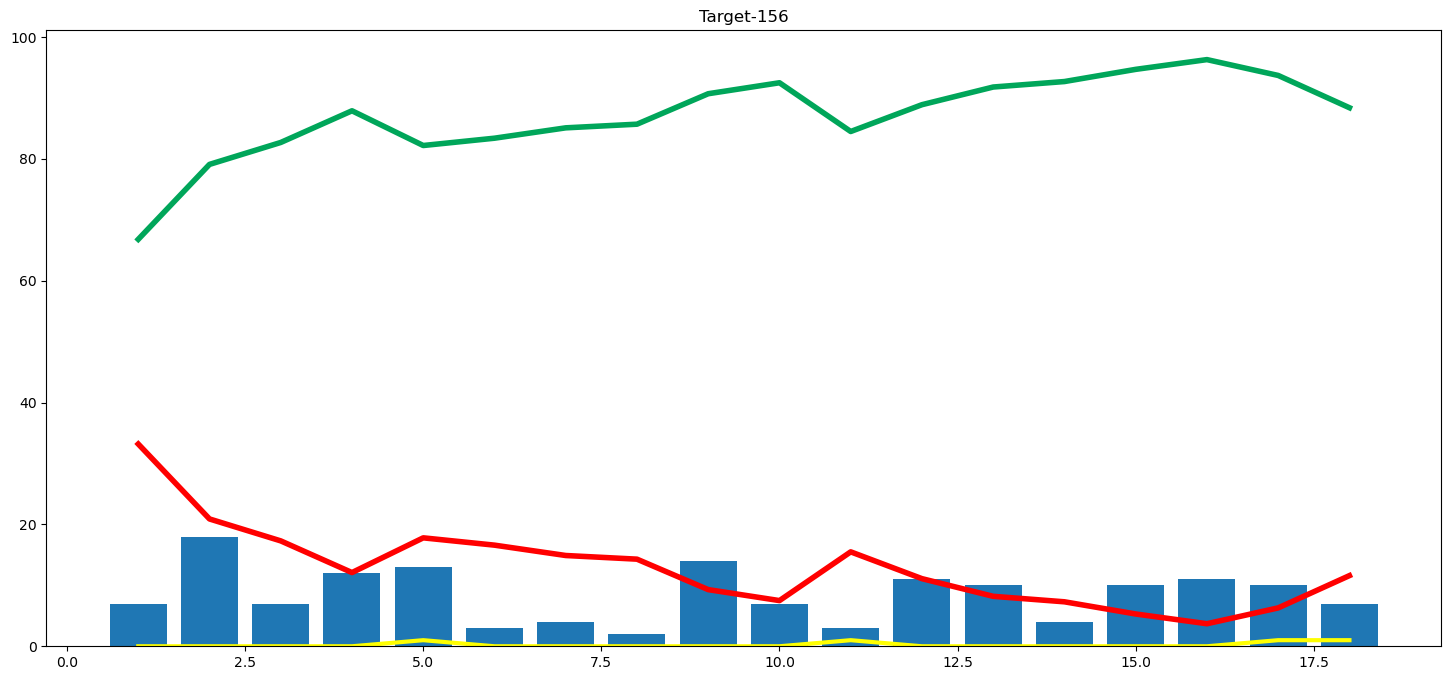

In [392]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [393]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Jaipur', 'Chennai',
       'Hyderabad', 'Kolkata', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Cuttack', 'Ahmedabad', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [394]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))